# Data Scientist Professional Practical Exam Submission


# Business Objective

The recipe business Tasty Bytes puts a recipe of choice on their website's homepage, and they have found that when there is a popular recipe on the homepage, they get higher web traffic and thus, more subscriptions/revenue etc. The goal of this analysis is to be able to predict which recipes will lead to high traffic, and be able to correctly predict high traffic recipes 80% of the time so they can make better decisions on which recipes to include on their homepage to drive business growth.

# Data

In [2]:
# import libraries and the data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("recipe.csv")
print(df.columns)
print(df.dtypes)


Index(['recipe', 'calories', 'carbohydrate', 'sugar', 'protein', 'category',
       'servings', 'high_traffic'],
      dtype='object')
recipe            int64
calories        float64
carbohydrate    float64
sugar           float64
protein         float64
category         object
servings         object
high_traffic     object
dtype: object


In [3]:
df.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN


## Data Cleaning

Firstly I will check if the servings column is all set, or if it needs cleaning.

In [4]:
df["servings"].value_counts()

4               389
6               197
2               183
1               175
4 as a snack      2
6 as a snack      1
Name: servings, dtype: int64

Turns out it has 3 values that do not match, so let's fix that.

In [5]:
# Extracting numerical part and converting to integers
df["servings"] = df["servings"].astype(str)
df['servings'] = df['servings'].str.extract('(\d+)').astype(int)
df["servings"].value_counts()

4    391
6    198
2    183
1    175
Name: servings, dtype: int64

In [6]:
categorial_vars = ["category", "high_traffic"]
for column in categorial_vars:
    print(df[column].value_counts())

Breakfast         106
Chicken Breast     98
Beverages          92
Lunch/Snacks       89
Potato             88
Pork               84
Vegetable          83
Dessert            83
Meat               79
Chicken            74
One Dish Meal      71
Name: category, dtype: int64
High    574
Name: high_traffic, dtype: int64


In [7]:
# checking na, going to have to impute calories and macronutrients
df.isna().sum()

recipe            0
calories         52
carbohydrate     52
sugar            52
protein          52
category          0
servings          0
high_traffic    373
dtype: int64

In [8]:
df["recipe"].describe()

count    947.000000
mean     474.000000
std      273.519652
min        1.000000
25%      237.500000
50%      474.000000
75%      710.500000
max      947.000000
Name: recipe, dtype: float64

In [9]:
df["high_traffic"] = df["high_traffic"].fillna("Low")
# Make the variable ordinal
df["high_traffic"] = pd.Categorical(df["high_traffic"], categories = ["High", "Low"], ordered=True)

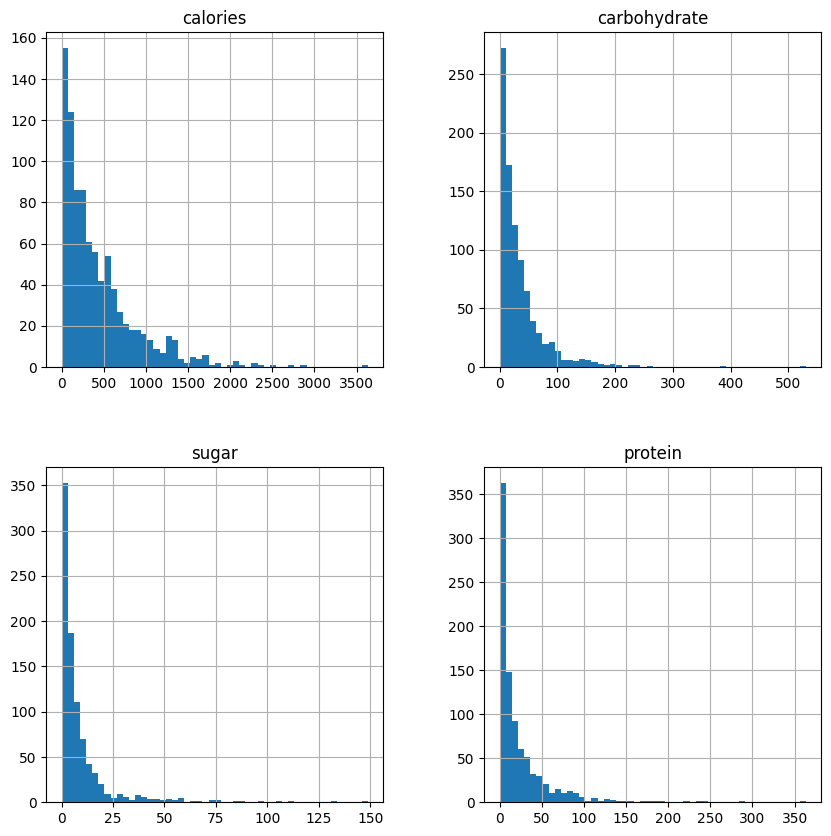

In [10]:
df[['calories', 'carbohydrate', 'sugar', 'protein']].hist(figsize=(10, 10), bins=50)
plt.show()

In [11]:
df["calories"].describe()

count     895.000000
mean      435.939196
std       453.020997
min         0.140000
25%       110.430000
50%       288.550000
75%       597.650000
max      3633.160000
Name: calories, dtype: float64

In [12]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Subset data
features = ['calories', 'carbohydrate', 'sugar', 'protein']
data_subset = df[features]

# MICE
mice_imputer = IterativeImputer(max_iter=10, random_state=42)
data_mice_imputed = mice_imputer.fit_transform(data_subset)

df[features] = data_mice_imputed

In [13]:
df["calories"].describe()

count     947.000000
mean      435.939196
std       440.394131
min         0.140000
25%       114.410000
50%       313.530000
75%       576.225000
max      3633.160000
Name: calories, dtype: float64

Using calories as an example, after imputation, the mean is the same but the median is higher and the standard deviation is lower.

In [14]:
df.isna().sum()

recipe          0
calories        0
carbohydrate    0
sugar           0
protein         0
category        0
servings        0
high_traffic    0
dtype: int64

There are no longer any missing values in the data.

## Data Validation Description

The columns calories, carbohydrate, sugar, and protein each had 52 missing values, but it would not be best to remove them or use simple imputation such as mean imputation, so I used MICE imputation to create better estimates for those features. MICE imputation starts with simple imputation such as mean imputation, then iteratively imputes each variable using regression, where the other variables are predictors. It then repeats that process until the imputations reach a stable point. 

For the "servings" variable, there were no missing values, but there were 3 that did not fit the format, so I cleaned those so that all of the recipes had a consistent format for number of servings.

"Category" contained only the correct types of recipes stated in the business objective. 

For the target variable "High Traffic" it was initially structured as either "High" or "Null", but I changed it so that it was an ordinal categorical variable with levels "High" and "Low" which can later be translated to 1 and 0 so that the models we will train can easily identify the levels of this target variable.


## Exploratory Data Analysis

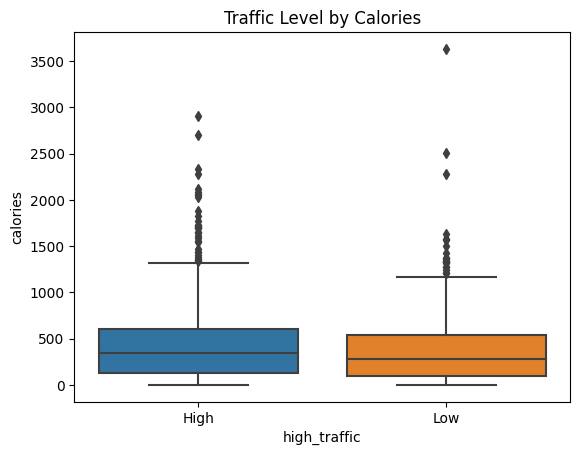

In [15]:
# do some exploring

sns.boxplot(x = "high_traffic", y="calories", data=df)
plt.title("Traffic Level by Calories")
plt.show()

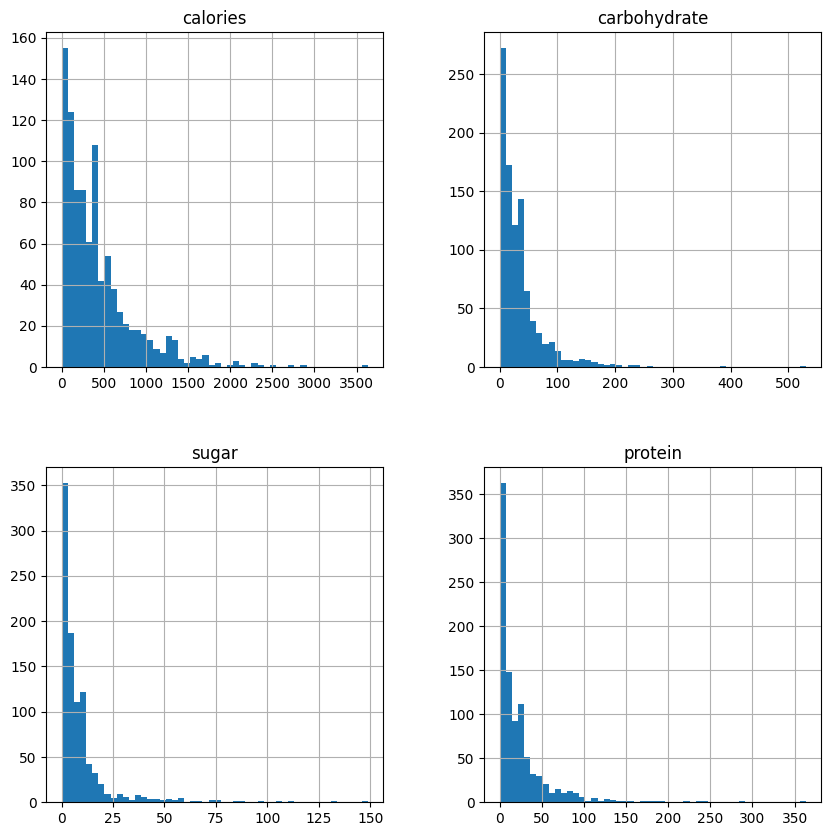

In [16]:
df[['calories', 'carbohydrate', 'sugar', 'protein']].hist(figsize=(10, 10), bins=50)
plt.show()

In [17]:
df.value_counts()

recipe  calories     carbohydrate  sugar      protein     category        servings  high_traffic
1       435.939196   35.069676     9.046547   24.149296   Pork            6         High            1
637     2029.330000  25.080000     0.610000   54.000000   One Dish Meal   1         High            1
625     68.540000    7.550000      17.680000  0.930000    Beverages       4         Low             1
626     113.120000   87.560000     16.960000  1.550000    Breakfast       2         High            1
627     544.010000   39.290000     1.750000   2.300000    Chicken Breast  6         High            1
                                                                                                   ..
320     409.030000   71.580000     5.730000   125.660000  Chicken Breast  2         High            1
321     31.750000    16.710000     1.020000   23.140000   Breakfast       1         Low             1
322     76.210000    91.250000     6.120000   3.270000    Dessert         4         Hig

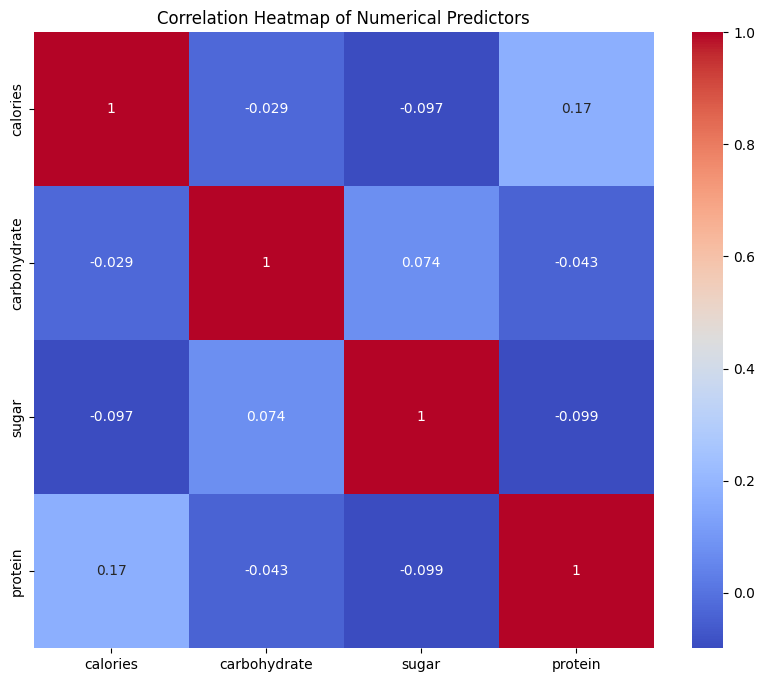

In [28]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[['calories', 'carbohydrate', 'sugar', 'protein']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numerical Predictors")
plt.show()

The numerical predictors are not very correlated with each other, which is mostly a good thing since we will be performing logistic regression.

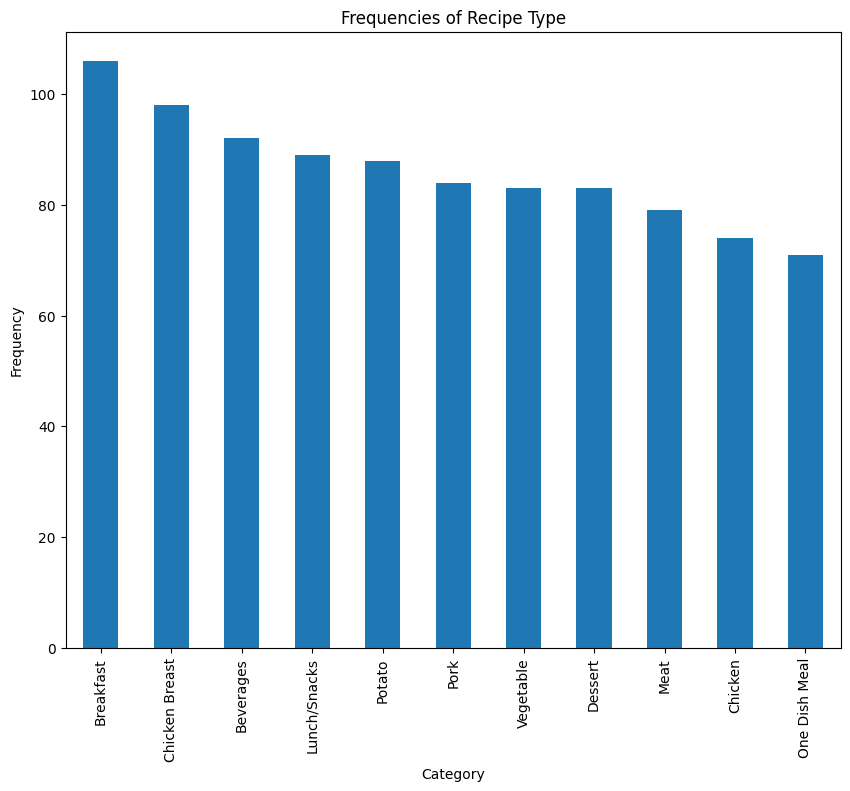

In [27]:
plt.figure(figsize=(10, 8))
df['category'].value_counts().plot(kind='bar')
plt.ylabel("Frequency")
plt.xlabel("Category")
plt.title("Frequencies of Recipe Type")
plt.show()

There is a pretty even distribution of recipe types in this dataset, each one has proper representation.

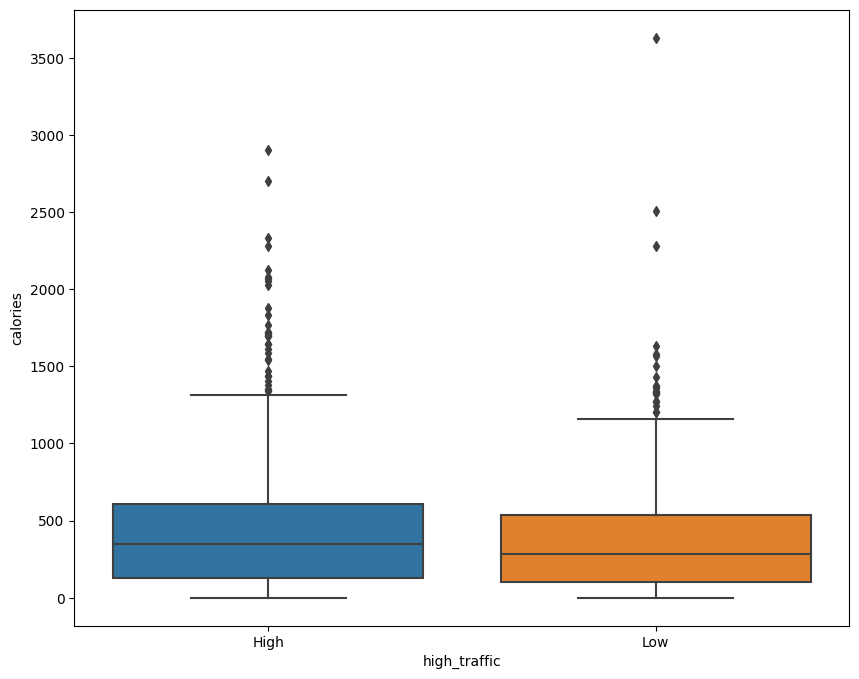

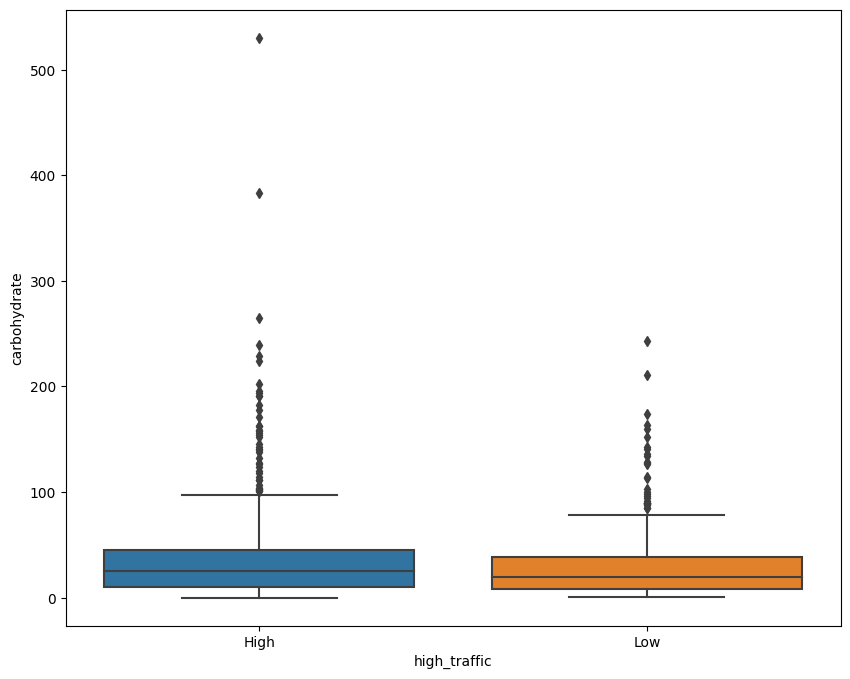

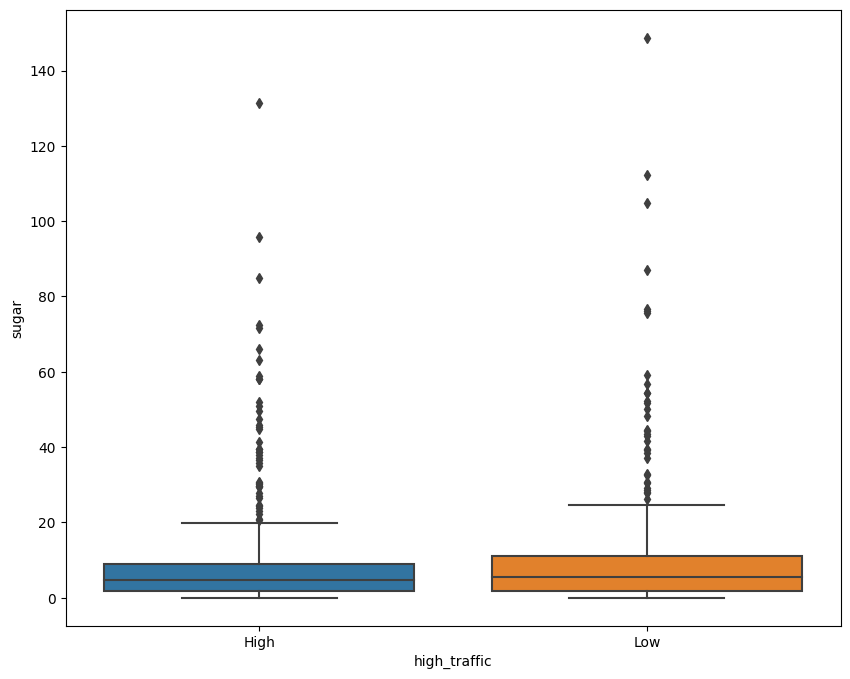

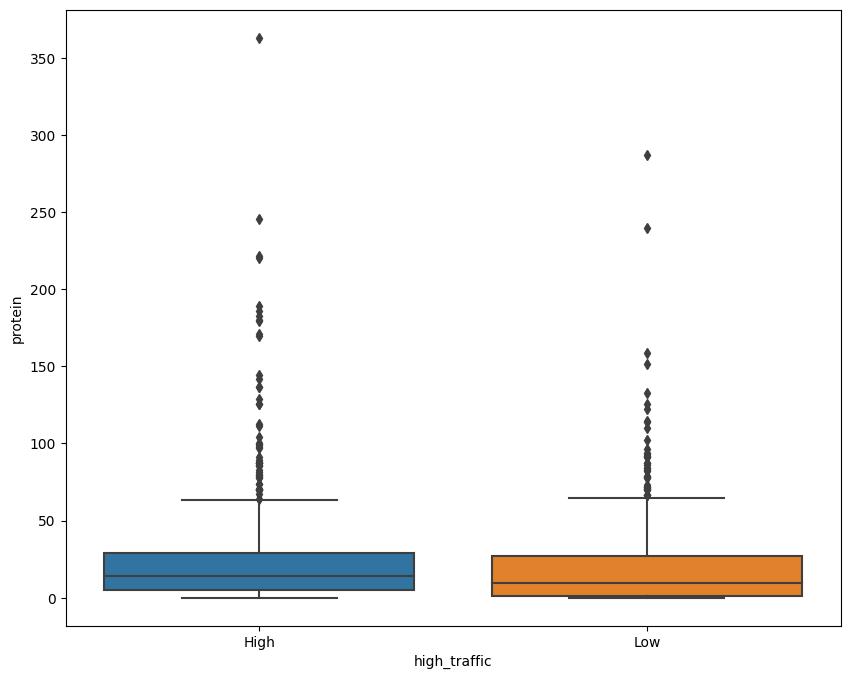

In [20]:
numeric_columns = ['calories', 'carbohydrate', 'sugar', 'protein']
for col in numeric_columns:
    plt.figure(figsize=(10, 8))
    sns.boxplot(x='high_traffic', y=col, data=df)
    plt.show()

Based on the boxplots showing the differences in traffic for each type of nutrition fact, there does not appear to be significant difference in the traffic levels for each variable.

# Model Development

In order to predict whether or not a recipe will be high traffic or not, we need to select methods that are good at predicting binary outcomes based on the values of the predictor variables, so I will use Logistic Regression as a baseline model and a Support Vector Classifier as a comparison model. Logistic Regression models are great binary classification models because they are simple, easy to implement and interpretable. It is a probabalistic method, meaning it predicts a new data point to belong to the class that it has the highest probability of being. I will compare that model with a Support Vector Classifier, which separates the two classes with a linear boundary. It can handle more complex relationships between variables and isn't prone to overfitting, which is good since the training set is large. 

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Preprocessing
X = df.drop(columns=['high_traffic'])
y = df['high_traffic'].replace({'High': 1, 'Low': 0})

# One-hot encoding for categorical variables and scaling for numerical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['calories', 'carbohydrate', 'sugar', 'protein', 'servings']),
        ('cat', OneHotEncoder(), ['category'])
    ])

X = preprocessor.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg_predictions = log_reg.predict(X_test)

# Decision Tree (or you can use SVM by replacing DecisionTreeClassifier with SVC)
complex_model = SVC()
complex_model.fit(X_train, y_train)
complex_model_predictions = complex_model.predict(X_test)

## Model Evaluation

In [22]:
print("Logistic Regression Classification Report:")
print(classification_report(y_test, log_reg_predictions))
print("Complex Model Classification Report:")
print(classification_report(y_test, complex_model_predictions))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.61      0.66        77
           1       0.76      0.84      0.80       113

    accuracy                           0.75       190
   macro avg       0.74      0.73      0.73       190
weighted avg       0.75      0.75      0.74       190

Complex Model Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.61      0.67        77
           1       0.76      0.85      0.80       113

    accuracy                           0.75       190
   macro avg       0.75      0.73      0.74       190
weighted avg       0.75      0.75      0.75       190



In [23]:
print("Logistic Regression Accuracy: ", accuracy_score(y_test, log_reg_predictions))
print("SVC Accuracy: ", accuracy_score(y_test, complex_model_predictions))

Logistic Regression Accuracy:  0.7473684210526316
SVC Accuracy:  0.7526315789473684


In [24]:
print(log_reg.coef_[0])
print(len(log_reg.coef_[0]))

[ 0.01238293  0.12159445 -0.13323797  0.0590415   0.02248767 -2.76498718
 -1.32880974 -1.23920537 -0.70500539  0.180484   -0.01952759  0.18839075
  0.11637563  1.52330225  1.72181178  2.32758237]
16


In [25]:
encoded_df = pd.get_dummies(df, columns=['category'])

feature_names = encoded_df.columns.tolist()
feature_names.remove('high_traffic')
feature_names.remove("recipe")

coefficients = log_reg.coef_[0]
coef_df = pd.DataFrame({'feature': feature_names, 'coefficient': coefficients})

# Show top features sorted by the absolute value of their coefficient
coef_df['abs_coefficient'] = coef_df['coefficient'].abs()
top_features = coef_df.sort_values('abs_coefficient', ascending=False)

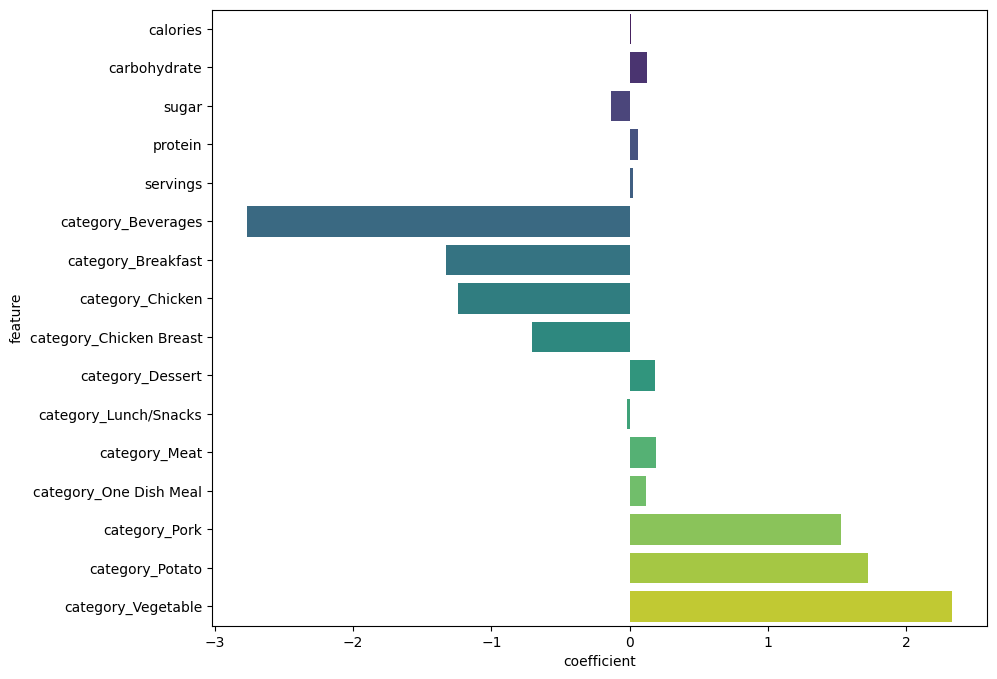

In [26]:
plt.figure(figsize=(10, 8))

# Create a bar plot of the coefficients (sorted by absolute value)
sns.barplot(data=coef_df, x='coefficient', y='feature', palette="viridis")

# Show the plot
plt.show()


There are some good insights from the coefficients in the logistic regression, such as the fact that Beverages, Breakfast, and Chicken recipes lead to much lower traffic than average, and Pork, Potato, and Vegetable recipes draw high traffic.

# Business Metrics

A good metric to measure the models is accuracy, which is the proportion of correctly predicted traffic based on the recipe. The target of building these models was to correctly predict high traffic recipes 80% of the time. These models are not quite there in terms of their accuracy (74.73% for Logisitc Regression and 75.26% for Support Vector Classifier) but they are pretty close, all things considered. It is possible there is a better model such as Random Forest or Neural Networks that could provide better accuracy but if we get back to Tasty Bytes and the increased accuracy is very important to them we can adjust.

# Summary

After applying machine learning methods to Tasty Bytes' data, I recommend for now that we use the models to make decisions on which recipes to put on the website, since the accuracy isn't too far off from the desired level. From there we can continue to collect data and make better models which may include choosing a different approach and tuning hyperparameters (e.g. Regularization). Also, if they want more traffic they should focus on Pork, Potato, and Vegetable recipes, and scale back on Beverage, Breakfast, and Chicken recipes. It seems that people are more into dinner-style recipes opposed to breakfast, lunch and drink recipes.